# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("LoansTrainingSet.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [6]:
df = df.replace({"Short Term":0,"Long Term":1})

In [7]:
df = df.drop(["Customer ID","Loan ID","Months since last delinquent"],axis=1)

In [8]:
df = df[df["Maximum Open Credit"]!="#VALUE!"]

In [9]:
df = df.astype({"Maximum Open Credit": float})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256980 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256980 non-null  object 
 1   Current Loan Amount        256980 non-null  int64  
 2   Term                       256980 non-null  int64  
 3   Credit Score               195305 non-null  float64
 4   Years in current job       245504 non-null  object 
 5   Home Ownership             256980 non-null  object 
 6   Annual Income              195305 non-null  float64
 7   Purpose                    256980 non-null  object 
 8   Monthly Debt               256980 non-null  object 
 9   Years of Credit History    256980 non-null  float64
 10  Number of Open Accounts    256980 non-null  int64  
 11  Number of Credit Problems  256980 non-null  int64  
 12  Current Credit Balance     256980 non-null  int64  
 13  Maximum Open Credit        25

In [11]:
df["Bankruptcies"].fillna(0,inplace=True)

In [12]:
df["Tax Liens"].fillna(0,inplace=True)

In [13]:
df = df.replace({"10+ years":11,"2 years":2,"3 years":3,"< 1 year":0.5,"5 years":5,"1 year":1,"4 years":4,"6 years":6,"7 years":7,"8 years":8,"9 years":9})

In [14]:
df = df.replace({"Fully Paid":1,"Charged Off":0})

In [15]:
df = df.replace({"other":"Other"})

In [16]:
df["Credit Score"].fillna(df["Credit Score"].mean(),inplace=True)

In [17]:
df["Annual Income"].fillna(df["Annual Income"].mean(),inplace=True)

In [18]:
df["Years in current job"].fillna(11,inplace=True,limit=4000)

In [19]:
df["Years in current job"].fillna(df["Years in current job"].mean(),inplace=True,limit=7476)

In [20]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.replace(',', '').str.replace('.', '').astype(float)

In [21]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

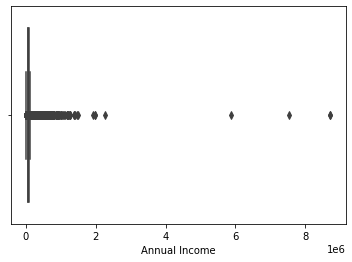

In [22]:
sns.boxplot(df["Annual Income"]);

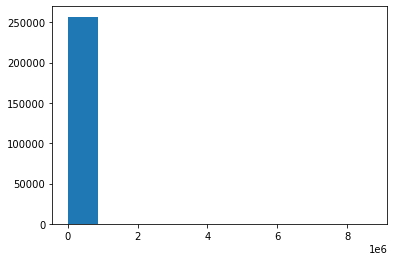

In [23]:
plt.hist(df["Annual Income"])
plt.show()

<AxesSubplot:>

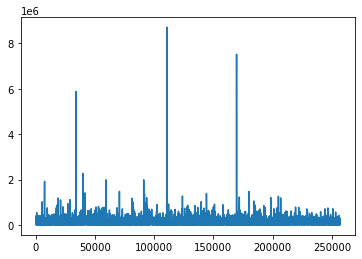

In [24]:
df["Annual Income"].plot.line()

<AxesSubplot:ylabel='Frequency'>

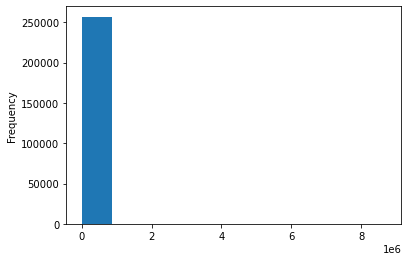

In [25]:
df["Annual Income"].plot.hist()

In [26]:
#df["Annual Income"].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Annual Income'>

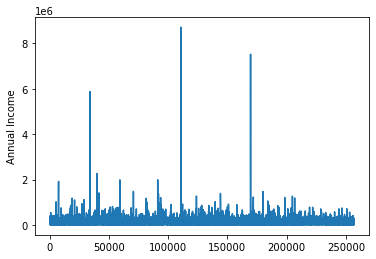

In [27]:
sns.lineplot(data=df["Annual Income"])

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

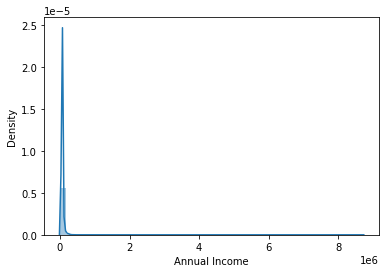

In [28]:
sns.distplot(df["Annual Income"],kde=True)

In [29]:
#sns.countplot(df["Annual Income"])

<AxesSubplot:ylabel='Annual Income'>

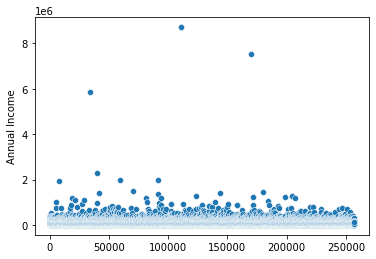

In [30]:
sns.scatterplot(data=df["Annual Income"])

In [31]:
#df = df[df["Annual Income"]<4000000]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256980 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256980 non-null  int64  
 1   Current Loan Amount        256980 non-null  int64  
 2   Term                       256980 non-null  int64  
 3   Credit Score               256980 non-null  float64
 4   Years in current job       256980 non-null  float64
 5   Home Ownership             256980 non-null  object 
 6   Annual Income              256980 non-null  float64
 7   Purpose                    256980 non-null  object 
 8   Monthly Debt               256980 non-null  float64
 9   Years of Credit History    256980 non-null  float64
 10  Number of Open Accounts    256980 non-null  int64  
 11  Number of Credit Problems  256980 non-null  int64  
 12  Current Credit Balance     256980 non-null  int64  
 13  Maximum Open Credit        25

In [33]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [34]:
df["Credit Score"].value_counts()

1251.092348    61675
747.000000      5669
740.000000      5537
741.000000      5499
746.000000      5486
               ...  
6070.000000        3
5980.000000        3
5910.000000        3
5930.000000        2
5860.000000        1
Name: Credit Score, Length: 335, dtype: int64

In [35]:
df["Annual Income"].value_counts()

71953.110893     61675
60684.000000        31
61188.000000        30
59646.000000        30
49630.000000        30
                 ...  
65276.000000         1
254462.000000        1
126888.000000        1
98337.000000         1
30854.000000         1
Name: Annual Income, Length: 60559, dtype: int64

In [36]:
#df.profile_report()

In [37]:
df_new=pd.get_dummies(df,drop_first=True)
df_new.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
201223,1,99999999,0,744.0,9.0,51158.0,107431.0,21.4,8,0,...,0,0,0,0,1,0,0,0,0,0
18324,0,9817,0,735.0,7.0,42213.0,92165.0,12.4,9,0,...,0,1,0,0,1,0,0,0,0,0
173810,0,12160,1,719.0,0.5,37492.0,39992.0,10.0,10,0,...,0,1,0,0,1,0,0,0,0,0
165438,1,21109,1,718.0,7.0,101525.0,254659.0,18.0,14,0,...,0,0,0,0,0,0,1,0,0,0
106512,1,17292,0,746.0,8.0,106806.0,159319.0,12.2,20,1,...,1,0,0,0,0,0,0,0,1,0


In [38]:
x=df_new.drop("Loan Status",axis=1)
y=df["Loan Status"]

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_=pca.fit_transform(x)
x_.shape

(256980, 3)

In [40]:
pca.explained_variance_ratio_

array([9.99733539e-01, 2.60512301e-04, 4.12265951e-06])

In [41]:
sum(pca.explained_variance_ratio_)

0.9999981743998427

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.25,random_state=101)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d= DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()
from sklearn.svm import SVC
svc = SVC()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
algorithms = [g,b,k,log,d,r,gbc,svc]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'Single Tree', 'Random Forest', 'Gradient Boost',"SVC"]

In [47]:
def algo_test(X,y,algorithms= algorithms,names=names):
        # fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns=["accuracy","precision","recall","f1"],index=names)
    metrics["accuracy"]=accuracy
    metrics["precision"]=precision
    metrics["recall"]=recall
    metrics["f1"]=f1
    return metrics.sort_values("f1",ascending=False)

In [ ]:
algo_test(x_train,y_train)

In [49]:
a = r.fit(x_train,y_train)

In [50]:
tahmin=a.predict(x_test)

In [51]:
tahmin

array([1, 0, 1, ..., 1, 1, 0])